<a href="https://colab.research.google.com/github/Saulo-Vini/IC/blob/main/Criando_Dados_de_Treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image, ImageSequence, ImageOps
import os
from os import listdir
import json


In [21]:
!git clone https://github.com/Saulo-Vini/IC.git


fatal: destination path 'IC' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [3]:
# Função para rotacionar, espelhar, centralizar e recortar a imagem
def augment_image(image, angles, crop_size):
    """Aplica rotações, espelhamento e recorte central."""
    augmented_images = []
    for angle in angles:
        # Rotacionar a imagem
        rotated = image.rotate(angle, resample=Image.BICUBIC, expand=True)

        # Espelhar horizontalmente
        mirrored = ImageOps.mirror(rotated)

        # Obter dimensões da imagem rotacionada
        width, height = rotated.size

        # Coordenadas para centralizar o recorte
        left = (width - crop_size[0]) // 2
        top = (height - crop_size[1]) // 2
        right = left + crop_size[0]
        bottom = top + crop_size[1]

        # Realizar o recorte central para as imagens rotacionadas e espelhadas
        cropped_rotated = rotated.crop((left, top, right, bottom))
        cropped_mirrored = mirrored.crop((left, top, right, bottom))

        # Adicionar à lista de imagens augmentadas
        augmented_images.append((cropped_rotated, angle, "normal"))
        augmented_images.append((cropped_mirrored, angle, "mirrored"))

    return augmented_images

In [7]:
# Caminhos e configurações
input_folder = "/content/IC/Imagens originais"  # Pasta com dados de entrada
output_folder = "/content/IC/Imagens_geradas"  # Pasta para salvar as imagens processadas
rotation_angles = list(range(15, 360, 15)) + list(range(45, 360, 45))  # Ângulos de rotação
output_size = (600, 600)  # Tamanho desejado das imagens de saída (em pixels)

os.makedirs(output_folder, exist_ok=True)

# Lista para armazenar todas as imagens processadas
all_Imagens_geradas = []

for i in listdir(input_folder):
    input = os.path.join(input_folder, i)
    if i.endswith(('.png', '.jpg', '.jpeg')): # Verifique se o arquivo é uma imagem
        input_path = os.path.join(input_folder, i) # Crie o caminho completo para a imagem

        with Image.open(input_path) as img:
          Imagens_geradas = augment_image(img, rotation_angles, output_size)

          for k in range(len(Imagens_geradas)):
            original_filename = f"imagem{k}"

                # Aplicar rotações, espelhamento e recorte central
            for j, (aug_img, angle, mode) in enumerate(Imagens_geradas):
                mode_suffix = "espelhada" if mode == "mirrored" else "normal"
                augmented_filename = f"{original_filename}_rot{angle}_{mode_suffix}.png"

                # Salvar imagem processada na pasta
                aug_img.save(os.path.join(output_folder, augmented_filename))

                # Adicionar imagem à lista consolidada
                all_Imagens_geradas.append(aug_img)


print(f"Processo concluído!")
print(f"- Imagens processadas salvas em: {output_folder}")


KeyboardInterrupt: 

In [8]:
pasta = listdir(output_folder)

len(pasta)

2760

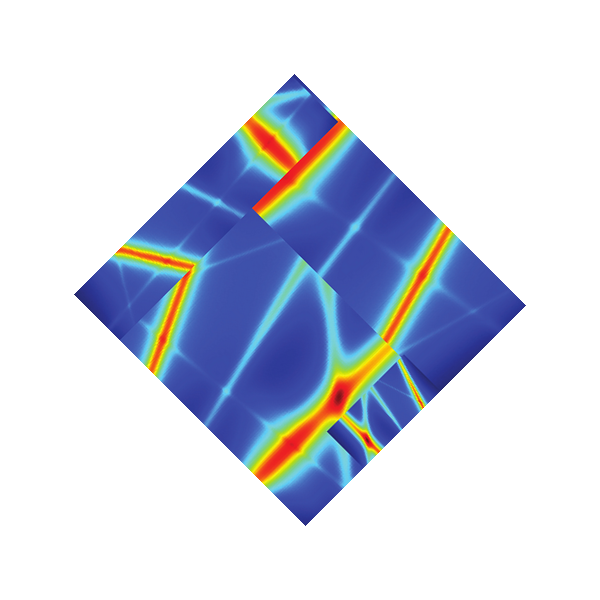

In [14]:
Image.open(os.path.join(output_folder, pasta[0]))

In [20]:
!git add .
!git commit -m "Imagens geradas"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
